# Computational Drug Discovery Project - Ligand Based Drug Design [Part4] Principal Component Analysis (PCA)

PCA is a common method to reduce the dimensionality of datasets and preserve variability so that the data can be easier to explore, visualise and analyse.

We used PCA to explore the distribution of molecules and their properties. 

-------------------------------------------------------------------------------------------------------------------

## Quantitative Structure-activity Relationship (QSAR) Study

In a typical QSAR study, PCA analyses an initial data matrix where molecules are characterized by multiple correlated quantitative dependent variables, known as molecular descriptors.

### Assigning Input (X) and Output (Y) variables

#### X variables

In [1]:
import pandas as pd
df = pd.read_csv('PPARa_fp_morgan.csv')
df

,smiles,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,...,bit2038,bit2039,bit2040,bit2041,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047
0,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCO[C@@H](Cc1ccc(OCCn2c3ccccc3c3cc(Br)ccc32)cc...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)[C@H](Cc1ccccc1)Oc1ccc(C(F)(F)F)cc1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cc1ccc(-c2nc(C)c(C(=O)N[C@H]3CCCN(c4cccc(C(=O)...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(C(...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,CC(C)(C)OC(=O)NC(CSCc1ccc(C(=O)c2ccc([N+](=O)[...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,CC(C)(C)OC(=O)NC(COCc1ccc(-c2ccccc2)cc1)C(=O)O,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1671,CC(SCc1ccccc1)C(NC(=O)c1ccccc1)C(=O)O,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1672,CC(C)(C)OC(=O)NC(COCc1ccc(Cc2ccccc2)cc1)C(=O)O,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [2]:
X = df.drop('smiles', axis=1)
X

,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,bit9,...,bit2038,bit2039,bit2040,bit2041,bit2042,bit2043,bit2044,bit2045,bit2046,bit2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1670,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1671,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1672,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
#  Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [4]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,1,0,0,1,0,1,1,1,...,0,0,1,1,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,1,1,1,...,1,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,1,0,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1670,1,0,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1671,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1672,1,0,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0


#### Y variables

In [5]:
df2= pd.read_csv('ppara_bioactivity_data_ro5.csv')
df2

,Unnamed: 0,molecule_chembl_id,canonical_smiles,type,pChEMBL,MW,LogP,NumHDonors,NumHAcceptors,#RO5 Violations
0,0,CHEMBL15594,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O,['IC50'],5.920819,304.474,6.21670,1.0,1.0,1.0
1,1,CHEMBL167430,CCO[C@@H](Cc1ccc(OCCn2c3ccccc3c3cc(Br)ccc32)cc...,['pEC50' 'EC50'],5.619930,482.374,5.66820,1.0,4.0,1.0
2,2,CHEMBL192518,O=C(O)[C@H](Cc1ccccc1)Oc1ccc(C(F)(F)F)cc1,['EC50' 'pEC50'],6.300686,310.271,3.78010,1.0,2.0,0.0
3,3,CHEMBL1934484,Cc1ccc(-c2nc(C)c(C(=O)N[C@H]3CCCN(c4cccc(C(=O)...,['EC50'],8.221849,435.549,4.52394,2.0,5.0,0.0
4,4,CHEMBL212911,CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(C(...,['IC50'],5.370896,460.570,6.04202,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1669,1669,CHEMBL5194126,CC(C)(C)OC(=O)NC(CSCc1ccc(C(=O)c2ccc([N+](=O)[...,EC50,5.318759,460.508,4.03690,2.0,7.0,0.0
1670,1670,CHEMBL5194570,CC(C)(C)OC(=O)NC(COCc1ccc(-c2ccccc2)cc1)C(=O)O,EC50,5.142668,371.433,3.84810,2.0,4.0,0.0
1671,1671,CHEMBL5207420,CC(SCc1ccccc1)C(NC(=O)c1ccccc1)C(=O)O,EC50,5.040959,329.421,3.19150,2.0,3.0,0.0
1672,1672,CHEMBL5186824,CC(C)(C)OC(=O)NC(COCc1ccc(Cc2ccccc2)cc1)C(=O)O,EC50,5.000000,385.460,3.77190,2.0,4.0,0.0


In [6]:
bioactivity_threshold = []
for i in df2.pChEMBL:
    if float(i) >= 7:
        bioactivity_threshold.append("active")
    elif float(i) < 5.5:
        bioactivity_threshold.append("inactive")
    else:
        bioactivity_threshold.append("intermediate")

In [7]:
df2.reset_index(inplace=True, drop=True)
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df_class = pd.concat([df2, bioactivity_class], axis=1)
df_class

,Unnamed: 0,molecule_chembl_id,canonical_smiles,type,pChEMBL,MW,LogP,NumHDonors,NumHAcceptors,#RO5 Violations,class
0,0,CHEMBL15594,CCCCC/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O,['IC50'],5.920819,304.474,6.21670,1.0,1.0,1.0,intermediate
1,1,CHEMBL167430,CCO[C@@H](Cc1ccc(OCCn2c3ccccc3c3cc(Br)ccc32)cc...,['pEC50' 'EC50'],5.619930,482.374,5.66820,1.0,4.0,1.0,intermediate
2,2,CHEMBL192518,O=C(O)[C@H](Cc1ccccc1)Oc1ccc(C(F)(F)F)cc1,['EC50' 'pEC50'],6.300686,310.271,3.78010,1.0,2.0,0.0,intermediate
3,3,CHEMBL1934484,Cc1ccc(-c2nc(C)c(C(=O)N[C@H]3CCCN(c4cccc(C(=O)...,['EC50'],8.221849,435.549,4.52394,2.0,5.0,0.0,active
4,4,CHEMBL212911,CCc1ccc(O[C@H](C)CCOc2ccc(CCC(=O)O)c(C)c2)c(C(...,['IC50'],5.370896,460.570,6.04202,1.0,4.0,1.0,inactive
...,...,...,...,...,...,...,...,...,...,...,...
1669,1669,CHEMBL5194126,CC(C)(C)OC(=O)NC(CSCc1ccc(C(=O)c2ccc([N+](=O)[...,EC50,5.318759,460.508,4.03690,2.0,7.0,0.0,inactive
1670,1670,CHEMBL5194570,CC(C)(C)OC(=O)NC(COCc1ccc(-c2ccccc2)cc1)C(=O)O,EC50,5.142668,371.433,3.84810,2.0,4.0,0.0,inactive
1671,1671,CHEMBL5207420,CC(SCc1ccccc1)C(NC(=O)c1ccccc1)C(=O)O,EC50,5.040959,329.421,3.19150,2.0,3.0,0.0,inactive
1672,1672,CHEMBL5186824,CC(C)(C)OC(=O)NC(COCc1ccc(Cc2ccccc2)cc1)C(=O)O,EC50,5.000000,385.460,3.77190,2.0,4.0,0.0,inactive


In [8]:
df_class['class'].value_counts()

intermediate    804
inactive        550
active          320
Name: class, dtype: int64

In [9]:
column = df_class["class"]
df3 = pd.concat([X,column], axis = 1)
df3

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,class
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,intermediate
1,1,1,1,0,0,1,0,1,1,1,...,0,1,1,0,0,0,0,0,0,intermediate
2,1,0,1,0,0,0,1,0,0,1,...,0,1,1,0,0,0,1,1,0,intermediate
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,active
4,1,1,0,0,1,0,0,1,1,1,...,1,1,0,0,0,0,0,1,1,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,1,0,0,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,inactive
1670,1,0,0,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0,1,0,inactive
1671,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,inactive
1672,1,0,0,0,0,0,1,0,1,0,...,0,1,1,0,0,0,0,1,0,inactive


 #### Data scaling

In [10]:
# Standardize the Data
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df3.iloc[:, 0:51].values
# Separating out the target
y = df3.loc[:,['class']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Perform PCA 

In [11]:
# PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [12]:
finalDf = pd.concat([principalDf, df3[['class']]], axis = 1)

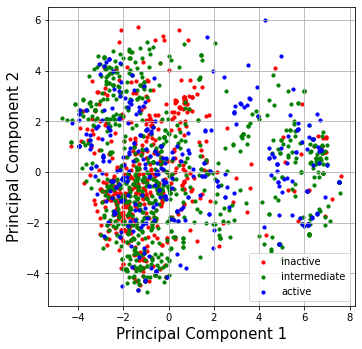

In [13]:
# Visualize 2D Projection
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5.5,5.5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

targets = ['inactive', 'intermediate', 'active']
colors = ['red', 'green', 'blue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()
fig.savefig('plot_classPCA_a.jpg')

In [14]:
pca.explained_variance_ratio_

array([0.16418927, 0.09207131])

In [15]:
fig.savefig('plot_classification_PCA_A.pdf')